In [1]:
# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# import sklearn
from sklearn.preprocessing import LabelEncoder

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15})     

# dataframe management
import pandas as pd

from operator import itemgetter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import clear_output

In [2]:
crg_5192 = pd.read_csv('../CRGs/datasets/matrix_CRG5192.csv')
crg_5192.head()

,Edad,Sexo,001,002,003,004,005,006,007,008,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,67,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crg_5192.shape

(12447, 2265)

#### Controlamos si hay algún valor nulo con:

In [4]:
Edad = crg_5192[crg_5192.columns[0:1]]
columnas_Edad = list(Edad.columns.values)

Genero = crg_5192[crg_5192.columns[1:2]]
columnas_Edad = list(Edad.columns.values)

Diagnostico = crg_5192[crg_5192.columns[2:1519]]
columnas_Diagnostico = list(Diagnostico.columns.values)

Farmacia = crg_5192[crg_5192.columns[1519:]]
columnas_Farmacia = list(Farmacia.columns.values)

N_Pacientes = crg_5192.shape[0]

In [5]:
print(Edad.isnull().any().any())
print(Genero.isnull().any().any())
print(Diagnostico.isnull().any().any())
print(Farmacia.isnull().any().any())

False
False
False
False


#### Ahora con Género

In [6]:
femenino = Genero[Genero == 2]
femenino = femenino.fillna(value =0)

masculino = Genero[Genero == 1]
masculino = masculino.fillna(value =0)

femenino = femenino['Sexo'].tolist()
Genero.insert(1, 'Femenino', femenino)

masculino = masculino['Sexo'].tolist()
Genero.insert(2, 'Masculino', masculino)

del(Genero['Sexo'])
Genero = (Genero>0.0)*1

### Ahora que tenemos todos los datos bien estructurados, vamos a volver a juntarlos

In [7]:
crg_5192_new = pd.concat([Edad, Genero, Diagnostico, Farmacia], axis = 1)
columnas_data =list(crg_5192_new.columns.values)
print(crg_5192_new.shape)
crg_5192_new.head()

(12447, 2266)


,Edad,Femenino,Masculino,001,002,003,004,005,006,007,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crg_5192_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,12447.0,53.798345,14.410662,-1.0,46.0,55.0,62.0,100.0
Femenino,12447.0,0.519322,0.499647,0.0,0.0,1.0,1.0,1.0
Masculino,12447.0,0.480678,0.499647,0.0,0.0,0.0,1.0,1.0
001,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,12447.0,0.000080,0.008963,0.0,0.0,0.0,0.0,1.0
003,12447.0,0.000161,0.017927,0.0,0.0,0.0,0.0,2.0
004,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,12447.0,0.000080,0.008963,0.0,0.0,0.0,0.0,1.0


In [9]:
edad = crg_5192_new[crg_5192_new.columns[:1]]
columnas_edad = list(edad.columns.values)

genero = crg_5192_new[crg_5192_new.columns[1:3]]
columnas_genero = list(genero.columns.values)

diagnostico = crg_5192_new[crg_5192_new.columns[3:1520]]
columnas_diagnostico = list(diagnostico.columns.values)

farmacia = crg_5192_new[crg_5192_new.columns[1520:]]
columnas_farmacia = list(farmacia.columns.values)

In [10]:
enfermedades = diagnostico[diagnostico.columns[:999]]
columnas_enfermedades = list(enfermedades.columns.values)

codigo_v = diagnostico[diagnostico.columns[999:1090]]
columnas_codigo_v = list(codigo_v.columns.values)


In [11]:
N_mujeres = crg_5192_new[crg_5192_new['Femenino']==1].shape[0]

print('Porcenjate Mujeres: %.3f'% round((N_mujeres/N_Pacientes)*100, 3))

N_hombres = crg_5192_new[crg_5192_new['Masculino']==1].shape[0]

print('Porcenjate Hombres: %.3f'% round((N_hombres/N_Pacientes)*100, 3))


Porcenjate Mujeres: 51.932
Porcenjate Hombres: 48.068


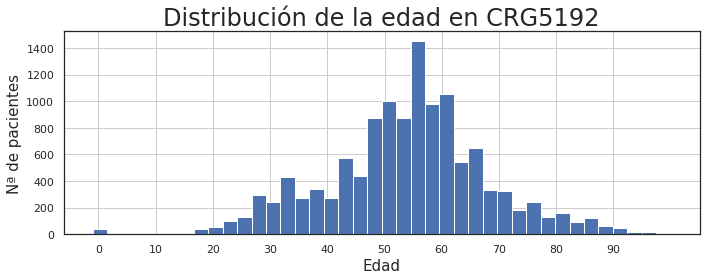

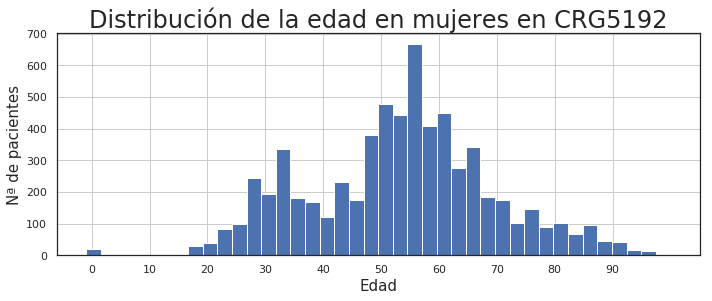

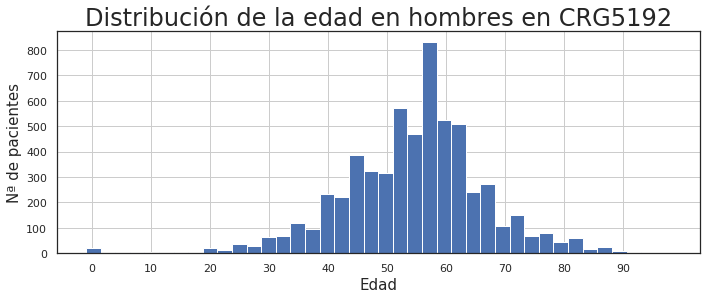

In [12]:
C = crg_5192_new[crg_5192_new.columns[:1]]
plt.figure(figsize=(10,4))
plt.hist(C.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en CRG5192')
plt.tight_layout()
plt.savefig("pictures/CRG5192/CRG5192_EDAD.png")  
plt.show()

A = crg_5192_new[crg_5192_new.columns[:1]][crg_5192_new.Femenino==1]
plt.figure(figsize=(10,4))
plt.hist(A.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.tight_layout()
plt.title('Distribución de la edad en mujeres en CRG5192')
plt.savefig("pictures/CRG5192/CRG5192_EDAD_mujeres.png")  
plt.show()

B = crg_5192_new[crg_5192_new.columns[:1]][crg_5192_new.Masculino==1]
plt.figure(figsize=(10,4))
plt.hist(B.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.tight_layout()
plt.title('Distribución de la edad en hombres en CRG5192')
plt.savefig("pictures/CRG5192/CRG5192_EDAD_HOMBRES.png")        
plt.show()

# Ocurrencia

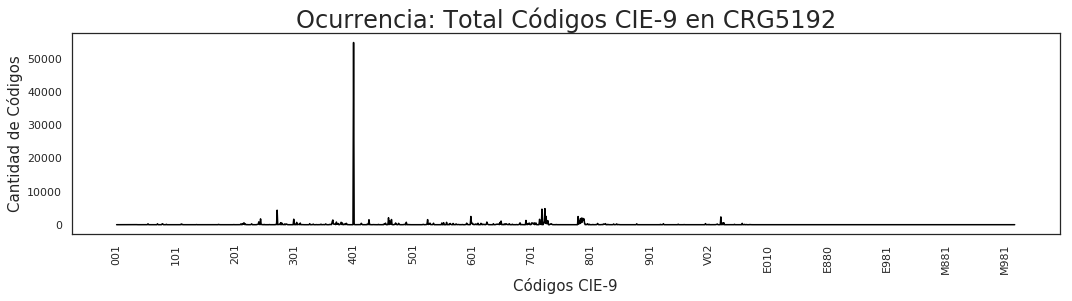

In [13]:
ploting = crg_5192_new[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de Códigos')        
plt.xlabel('Códigos CIE-9')
plt.tight_layout()
plt.title('Ocurrencia: Total Códigos CIE-9 en CRG5192')

plt.savefig("pictures/CRG5192/CRG5192_O_CIE.png")     
plt.show()

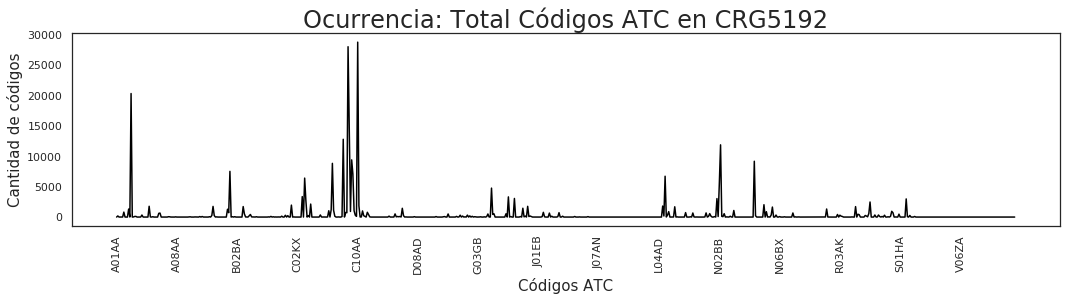

In [14]:
ploting = crg_5192_new[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')          
plt.xlabel('Códigos ATC')
plt.tight_layout()
plt.title('Ocurrencia: Total Códigos ATC en CRG5192')

plt.savefig("pictures/CRG5192/CRG5192_O_ATC.png")     
plt.show()

## Ocurrencia de códigos CIE-9 según el genero

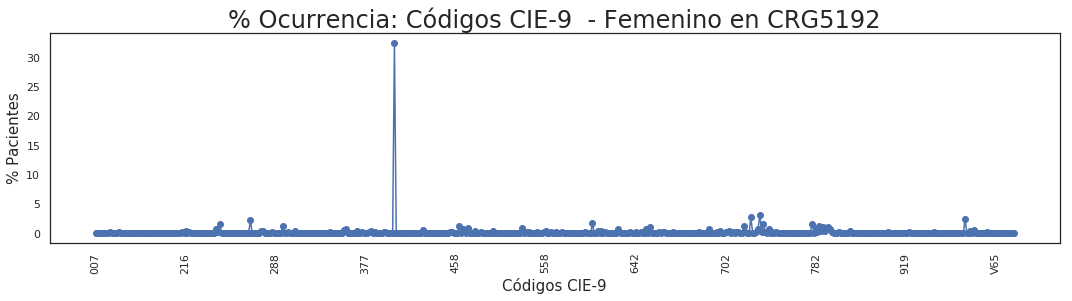

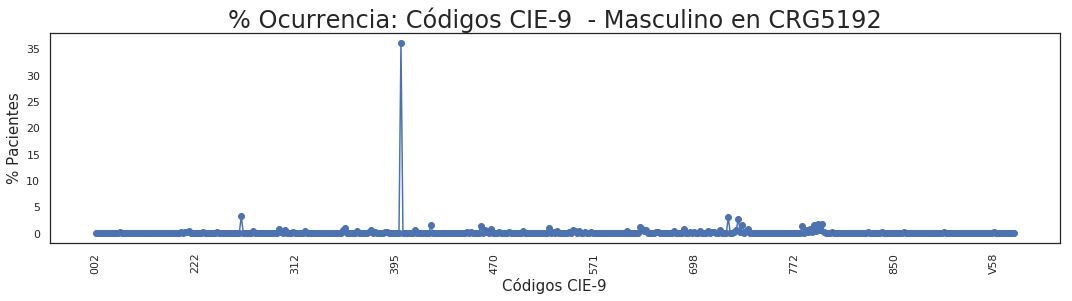

In [15]:
for g in columnas_genero:
    A = crg_5192_new[columnas_diagnostico][crg_5192_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.tight_layout()
        plt.title('% Ocurrencia: Códigos CIE-9  - {} en CRG5192'.format(g))
        
        plt.savefig("pictures/CRG5192/CRG5192_O_CIE_{}.png".format(g))        
        plt.show()


In [16]:
for g in columnas_genero:
    A = crg_5192_new[columnas_codigo_v][crg_5192_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_codigo_v, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
V22     54.672897
V27     13.925234
V25      9.649533
V58      5.630841
V16      2.593458
Grupos mayoritarios para Masculino
            Valor
Código           
V58     25.603865
V25     17.874396
V16     14.653784
V45     11.433172
V62      5.314010


## Ocurrencia  de ATC según el genero

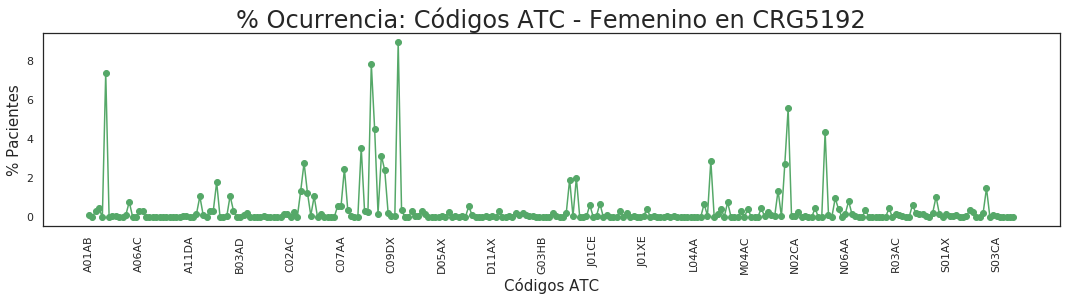

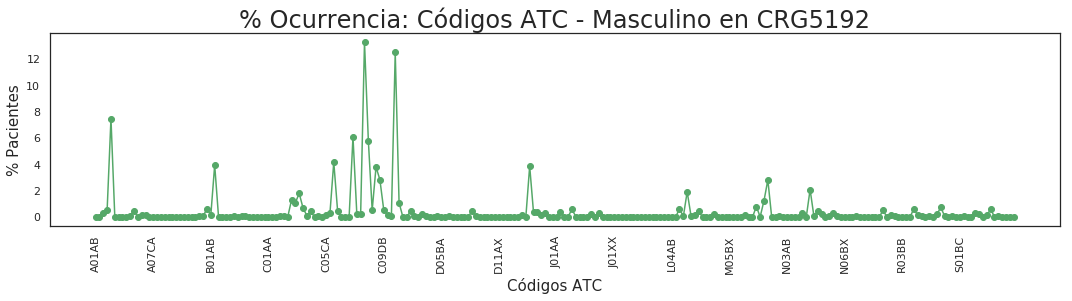

In [17]:
for g in columnas_genero:
    A = crg_5192_new[columnas_farmacia][crg_5192_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.tight_layout()
        plt.title('% Ocurrencia: Códigos ATC - {} en CRG5192'.format(g))
        
        plt.savefig("pictures/CRG5192/CRG5192_O_ATC_{}.png".format(g))        
        plt.show()

In [18]:
for g in columnas_genero:
    A = crg_5192_new[columnas_farmacia][crg_5192_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
C10AA   8.930597
C09AA   7.822306
A02BC   7.377678
N02BE   5.545391
C09BA   4.474480
Grupos mayoritarios para Masculino
            Valor
Código           
C09AA   13.262683
C10AA   12.488875
A02BC    7.475195
C08CA    6.081682
C09BA    5.806441


--------------------------------------------------------------

# Presencia

In [19]:
presencia = (crg_5192_new[crg_5192_new.columns[3:]]>0)*1
crg_5192_new_P = pd.concat([Edad, Genero, presencia], axis = 1)

In [20]:
crg_5192_new_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,12447.0,53.798345,14.410662,-1.0,46.0,55.0,62.0,100.0
Femenino,12447.0,0.519322,0.499647,0.0,0.0,1.0,1.0,1.0
Masculino,12447.0,0.480678,0.499647,0.0,0.0,0.0,1.0,1.0
001,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,12447.0,0.000080,0.008963,0.0,0.0,0.0,0.0,1.0
003,12447.0,0.000080,0.008963,0.0,0.0,0.0,0.0,1.0
004,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,12447.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,12447.0,0.000080,0.008963,0.0,0.0,0.0,0.0,1.0


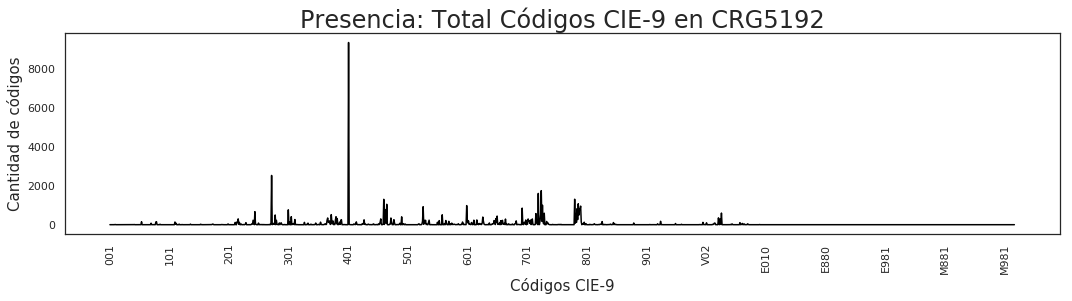

In [21]:
ploting = crg_5192_new_P[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos CIE-9')
plt.tight_layout()
plt.title('Presencia: Total Códigos CIE-9 en CRG5192')

plt.savefig("pictures/CRG5192/CRG5192_P_CIE.png")     
plt.show()

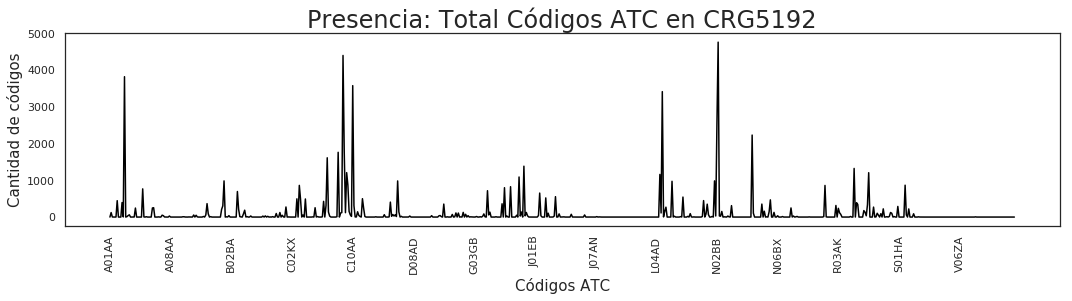

In [22]:
ploting = crg_5192_new_P[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')         
plt.xlabel('Códigos ATC')
plt.tight_layout()
plt.title('Presencia: Total Códigos ATC en CRG5192')

plt.savefig("pictures/CRG5192/CRG5192_P_ATC.png")     
plt.show()

## Presencia de diagnosticos según el grupo de edad y genero

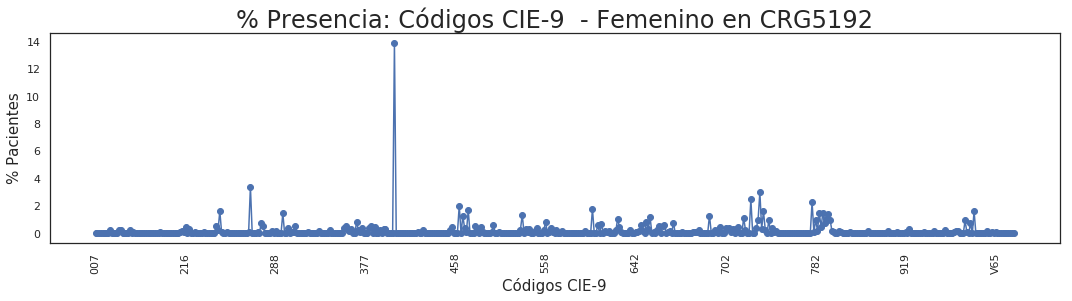

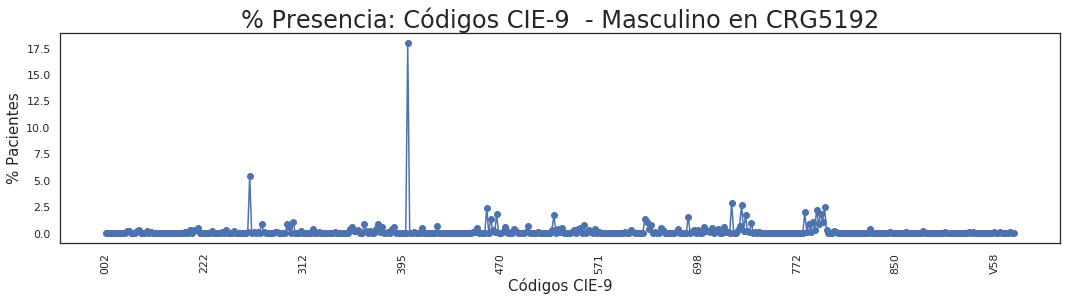

In [23]:
for g in columnas_genero:
    A = crg_5192_new_P[columnas_diagnostico][crg_5192_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.tight_layout()
        plt.title('% Presencia: Códigos CIE-9  - {} en CRG5192'.format(g))
        
        plt.savefig("pictures/CRG5192/CRG5192_P_CIE_{}.png".format(g))        
        plt.show()



In [24]:
for g in columnas_genero:
    A = crg_5192_new_P[columnas_diagnostico][crg_5192_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_diagnostico, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
401     13.897183
272      3.406438
724      2.999294
719      2.494436
780      2.282721
Grupos mayoritarios para Masculino
            Valor
Código           
401     18.001542
272      5.418023
719      2.916738
724      2.732568
790      2.471304


## Presencia  de farmacos según el genero y edad

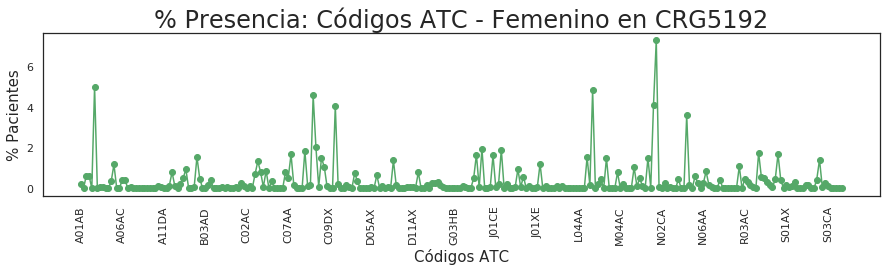

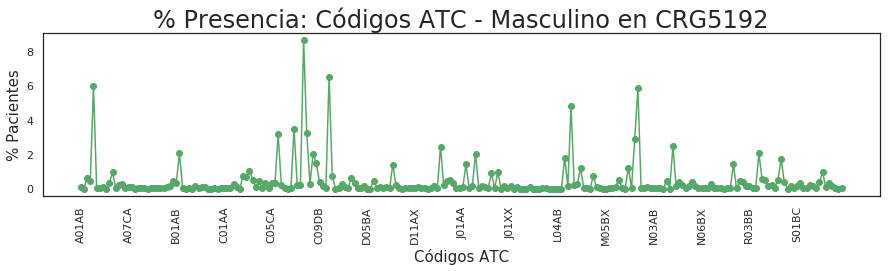

In [25]:
for g in columnas_genero:
    A = crg_5192_new_P[columnas_farmacia][crg_5192_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,3))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Presencia: Códigos ATC - {} en CRG5192'.format(g))
        
        plt.savefig("pictures/CRG5192/CRG5192_P_ATC_{}.png".format(g))        
        plt.show()

In [26]:
for g in columnas_genero:
    A = crg_5192_new_P[columnas_farmacia][crg_5192_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
N02BE   7.244402
A02BC   4.969805
M01AE   4.795921
C09AA   4.539794
N02BB   4.060437
Grupos mayoritarios para Masculino
           Valor
Código          
C09AA   8.641240
C10AA   6.523873
A02BC   5.973498
N02BE   5.875342
M01AE   4.809647


# Multilabel

In [27]:
crg_5192_with_labels_O = crg_5192
crg_5192_with_labels_O['HP'] = np.ones(N_Pacientes, dtype=int)
crg_5192_with_labels_O['Diabetes'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_labels_O['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_labels_O['M01AE'].describe()

count    12447.000000
mean         0.539648
std          1.323777
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         26.000000
Name: M01AE, dtype: float64

In [28]:
crg_5192_with_labels_O.to_csv('datasets/label/crg_5192_with_labels_O.csv', index=False)

In [29]:
crg_5192_with_labels_P = pd.concat([Edad, crg_5192[crg_5192.columns[1:2]], presencia], axis = 1)
crg_5192_with_labels_P['HP'] = np.ones(N_Pacientes, dtype=int)
crg_5192_with_labels_P['Diabetes'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_labels_P['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_labels_P['M01AE'].describe()

count    12447.000000
mean         0.274203
std          0.446130
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: M01AE, dtype: float64

In [30]:
crg_5192_with_labels_P.to_csv('datasets/label/crg_5192_with_labels_P.csv', index=False)

# Multi clase

In [27]:
crg_5192_with_classes_O = pd.read_csv('../CRGs/datasets/matrix_CRG5192.csv')
crg_5192_with_classes_O['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_O['CRG5192'] = np.ones(N_Pacientes, dtype=int)
crg_5192_with_classes_O['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_O['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_O['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_O['M01AE'].describe()

count    12447.000000
mean         0.539648
std          1.323777
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         26.000000
Name: M01AE, dtype: float64

In [28]:
crg_5192_with_classes_O.to_csv('datasets/class/crg_5192_with_classes_O.csv', index=False)

In [31]:
crg_5192_with_classes_P = pd.concat([Edad, crg_5192[crg_5192.columns[1:2]], presencia], axis = 1)
crg_5192_with_classes_P['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_P['CRG5192'] = np.ones(N_Pacientes, dtype=int)
crg_5192_with_classes_P['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_P['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_P['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_5192_with_classes_P['M01AE'].describe()

count    12447.000000
mean         0.274203
std          0.446130
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: M01AE, dtype: float64

In [32]:
crg_5192_with_classes_P.to_csv('datasets/class/crg_5192_with_classes_P.csv', index=False)